In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

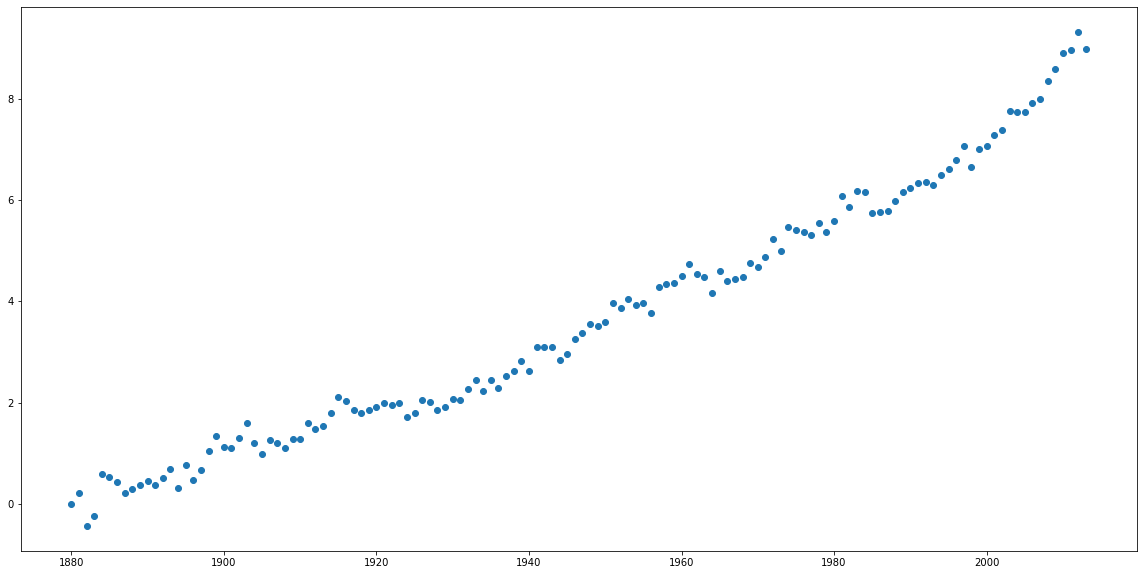

In [8]:
# Create scatter plot
plt.figure(1, figsize=(20, 10))
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])

# Create first line of best fit
regress = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
last_year = df["Year"].max()
df = df.append([{"Year": y} for y in range(last_year + 1, 2050)])
plt.plot(
    df["Year"],
    regress.intercept + regress.slope * df["Year"],
    c="r",
    label="fit all",
)

# Create second line of best fit
df_recent = df.loc[(df["Year"] >= 2000) & (df["Year"] <= last_year)]
bestfit = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])
df_recent = df_recent.append([{"Year": y} for y in range(last_year + 1, 2050)]
)
plt.plot(
    df_recent["Year"],
    bestfit.intercept + bestfit.slope * df_recent["Year"],
    c="b",
    label="fit recent",
)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")


plt.savefig('sea_level_plot.png')